<h1>Exploratory data analysis</h1>

<h3>Import libraries</h3>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
import ast
import os

<h3>Read files</h3>

In [3]:
movies_df = pd.read_csv('../data/tmdb_5000_movies.csv')
credits_df = pd.read_csv('../data/tmdb_5000_credits.csv')

In [4]:
print(movies_df.shape)
print(credits_df.shape)


(4803, 20)
(4803, 4)


In [5]:
print(movies_df.columns)
print(credits_df.columns)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')
Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')


<h3>Merge our files</h3>

movies_df = movies_df.merge(credits_df, left_on='id', right_on='movie_id')

In [6]:
print(movies_df.shape)

(4803, 20)


<h3>Find the duplicates</h3>

In [7]:
print(movies_df.duplicated().sum())

0


<h3>Check the passes</h3>

In [8]:
print(movies_df.isnull().sum())

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64


<h3>Remove the spaces and replace them with an empty line</h3>

In [9]:
movies_df['overview'] = movies_df['overview'].fillna('')

In [10]:
print(movies_df.columns)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


In [11]:

movies_df = movies_df.rename(columns={'title_x': 'title'})


In [12]:
#look at some  films
movies_df[['title', 'genres', 'overview', 'vote_average', 'popularity']].head()

,title,genres,overview,vote_average,popularity
0,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","In the 22nd century, a paraplegic Marine is di...",7.2,150.437577
1,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","Captain Barbossa, long believed to be dead, ha...",6.9,139.082615
2,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",A cryptic message from Bond’s past sends him o...,6.3,107.376788
3,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Following the death of District Attorney Harve...,7.6,112.312950
4,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","John Carter is a war-weary, former military ca...",6.1,43.926995


<h3> Histogram vote_average</h3>

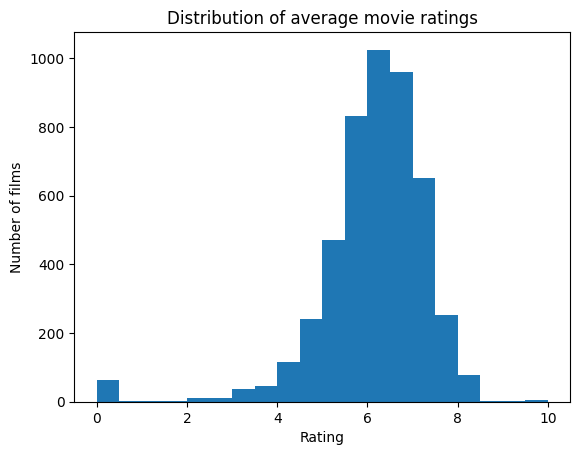

In [13]:
plt.hist(movies_df['vote_average'], bins=20)
plt.title('Distribution of average movie ratings')
plt.xlabel('Rating')
plt.ylabel('Number of films')
plt.show()

<h3>Histogram runtime</h3>

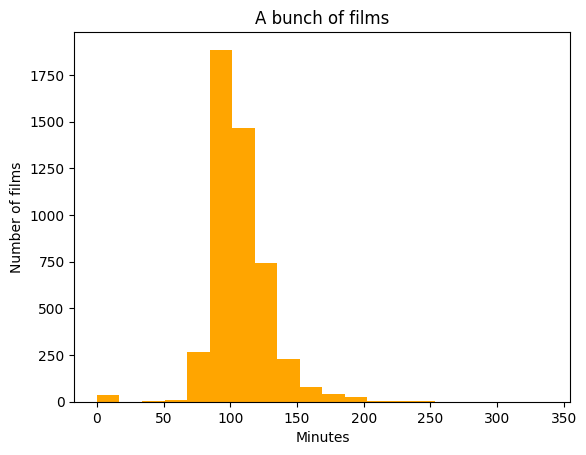

In [14]:
plt.hist(movies_df['runtime'].dropna(), bins=20, color='orange')
plt.title('A bunch of films')
plt.xlabel('Minutes')
plt.ylabel('Number of films')
plt.show()

<h3>Convert str into list</h3>

In [15]:
def convert(obj):
    L = []
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [16]:
movies_df['genres'] = movies_df['genres'].apply(convert)

In [17]:
movies_df['keywords'] = movies_df['keywords'].apply(convert)

In [18]:
def get_top_actors(obj):
    L = []
    for i in ast.literal_eval(obj)[:3]:
        L.append(i['name'])
    return L

In [19]:
movies_df['cast'] = movies_df['cast'].apply(get_top_actors)


KeyError: 'cast'

In [ ]:
def get_director(obj):
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            return i['name']
    return np.nan


In [ ]:
movies_df['director'] = movies_df['crew'].apply(get_director)

In [ ]:
movies_df['genres'] = movies_df['genres'].apply(convert)

In [ ]:
movies_df['keywords'] = movies_df['keywords'].apply(convert)

In [ ]:
def get_top_actors(obj):
    L=[]
    for i in ast.literal_eval(obj)[:3]:
        L.append(i['name'])
        return L

In [ ]:
movies_df['cast'] = movies_df['cast'].apply(get_top_actors)

In [ ]:
def get_director(obj):
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            return i['name']
    return np.nan


In [ ]:
movies_df['director'] = movies_df['crew'].apply(get_director)

<h3>Creating of new features</h3>

In [ ]:
# data release
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')
movies_df['release_year'] = movies_df['release_date'].dt.year

# overview length
movies_df['overview_length'] = movies_df['overview'].fillna('').apply(lambda x: len(x.split()))

# сount of genre
movies_df['genre_count'] = movies_df['genres'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# count of keywords
movies_df['keyword_count'] = movies_df['keywords'].apply(lambda x: len(x) if isinstance(x, list) else 0)

In [ ]:
def clean_join(L):
    return " ".join(L) if isinstance(L, list) else ""

<h3>Correlation analysis</h3>

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(movies_df[['vote_average','popularity','runtime','overview_length','genre_count','keyword_count']].corr(), annot=True, cmap='coolwarm')
plt.title('Кореляційна матриця')
plt.show()

<h3>Formation of the final dataset for the model</h3>

In [ ]:

movies_df['genres'] = movies_df['genres'].apply(clean_join)
movies_df['keywords'] = movies_df['keywords'].apply(clean_join)
movies_df['cast'] = movies_df['cast'].apply(clean_join)

#combine everything in tags
movies_df['tags'] = movies_df['overview'] + " " + movies_df['genres'] + " " + movies_df['keywords'] + " " + movies_df['cast'] + " " + movies_df['director'].fillna('')

#view of the final dataset
final_df = movies_df[['movie_id','title','tags','vote_average','popularity','runtime','release_year']]


In [ ]:
final_df.head()

<h3>Final file</h3>

In [ ]:
final_df.to_csv('../data/processed_movies.csv', index=False)